#***Challenges ONE - Alura Store***
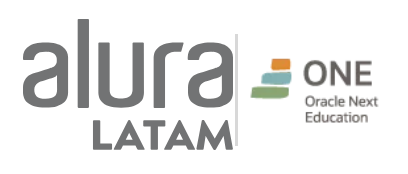

##***Alumno:*** Sebastián Ramírez

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# Verificamos las primeras filas de cada DataFrame para entender su estructura

In [ ]:
tienda_1_head = tienda.head()
tienda_2_head = tienda2.head()
tienda_3_head = tienda3.head()
tienda_4_head = tienda4.head()

tienda_1_columns = tienda.columns
tienda_2_columns = tienda2.columns
tienda_3_columns = tienda3.columns
tienda_4_columns = tienda4.columns

tienda_1_head, tienda_1_columns, tienda_2_columns, tienda_3_columns, tienda_4_columns

(            Producto Categoría del Producto    Precio  Costo de envío  \
 0  Asistente virtual           Electrónicos  164300.0          6900.0   
 1    Mesa de comedor                Muebles  192300.0          8400.0   
 2      Juego de mesa               Juguetes  209600.0         15900.0   
 3         Microondas      Electrodomésticos  757500.0         41000.0   
 4   Silla de oficina                Muebles  335200.0         20200.0   
 
   Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
 0      16/01/2021      Pedro Gomez          Bogotá             4   
 1      18/05/2022  Beatriz Morales        Medellín             1   
 2      15/03/2021   Juan Fernandez       Cartagena             1   
 3      03/05/2022   Juan Fernandez            Cali             4   
 4      07/11/2020    Maria Alfonso        Medellín             5   
 
        Método de pago  Cantidad de cuotas       lat       lon  
 0  Tarjeta de crédito                   8   4.60971 -74.08175  
 1  Tarj

Los datos de las 4 tiendas tienen la misma estructura, lo cual es ideal para compararlas directamente. Cada archivo contiene las siguientes columnas:

+ Producto: Nombre del artículo vendido.
+ Categoría del Producto: Tipo de producto (Electrónicos, Muebles, etc.).
+ Precio: Valor de venta del producto.
+ Costo de envío: Costo asociado al envío del producto.
+ Fecha de Compra: Fecha en la que se realizó la compra.
+ Vendedor: Nombre del vendedor responsable.
+ Lugar de Compra: Ciudad donde se hizo la compra.
+ Calificación: Evaluación del cliente (1 a 5).
+ Método de pago: Forma de pago utilizada.
+ Cantidad de cuotas: Número de cuotas en el pago.
+ lat y lon: Coordenadas geográficas de la compra.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

#1. Análisis de facturación



In [ ]:
# Calculamos el ingreso total por tienda sumando la columna "Precio"

ingresos = {
    'Tienda 1': tienda['Precio'].sum(),
    'Tienda 2': tienda2['Precio'].sum(),
    'Tienda 3': tienda3['Precio'].sum(),
    'Tienda 4': tienda4['Precio'].sum(),
}

# Convertir los ingresos a pesos colombianos (formato legible)
ingresos_formateado = {k: f"${v:,.0f} COP" for k, v in ingresos.items()}

ingresos_formateado

{'Tienda 1': '$1,150,880,400 COP',
 'Tienda 2': '$1,116,343,500 COP',
 'Tienda 3': '$1,098,019,600 COP',
 'Tienda 4': '$1,038,375,700 COP'}

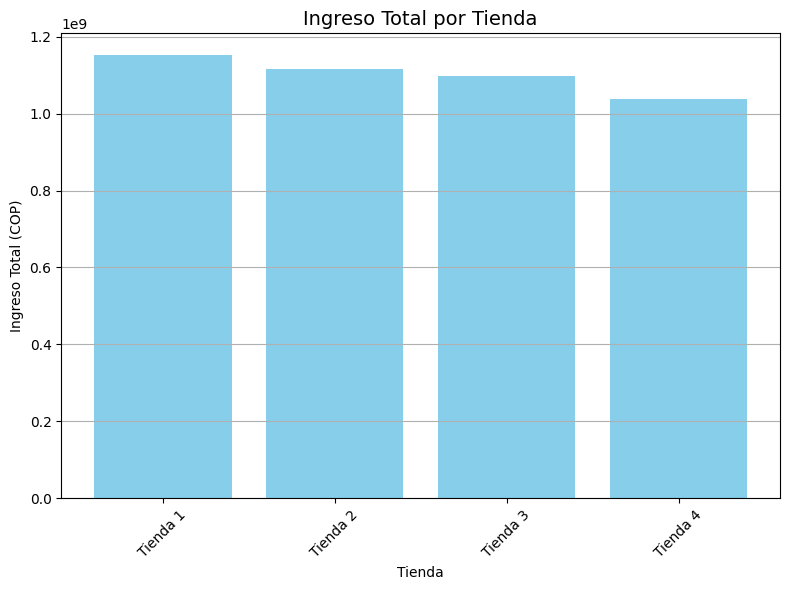

In [ ]:
# Gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(ingresos.keys(), ingresos.values(), color='skyblue')
plt.title("Ingreso Total por Tienda", fontsize=14)
plt.xlabel("Tienda")
plt.ylabel("Ingreso Total (COP)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Resultado del Análisis de Facturación:

+ Tienda 1: $1,150,880,400 COP

+ Tienda 4: $1,038,375,700 COP (la más baja)

La tienda 4 tiene el ingreso más bajo de todas las sucursales.

# 2. Ventas por categoría

In [ ]:
# Contamos cuántas veces aparece cada categoría en cada tienda

ventas_categoria_1 = tienda['Categoría del Producto'].value_counts()
ventas_categoria_2 = tienda2['Categoría del Producto'].value_counts()
ventas_categoria_3 = tienda3['Categoría del Producto'].value_counts()
ventas_categoria_4 = tienda4['Categoría del Producto'].value_counts()

# Unificamos en un DataFrame
df_categorias = pd.DataFrame({
    'Tienda 1': ventas_categoria_1,
    'Tienda 2': ventas_categoria_2,
    'Tienda 3': ventas_categoria_3,
    'Tienda 4': ventas_categoria_4,
}).fillna(0).astype(int)

df_categorias

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Electrónicos,448,422,451,451
Instrumentos musicales,182,224,177,170
Juguetes,324,313,315,338
Libros,173,197,185,187
Muebles,465,442,499,480


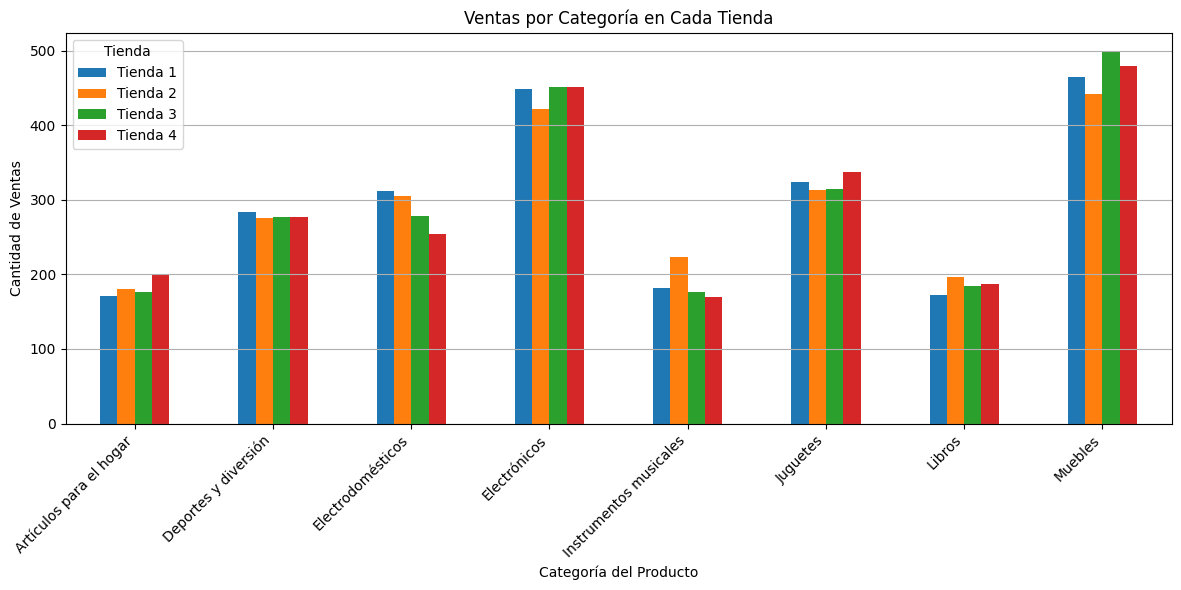

In [ ]:
# Gráfico de barras agrupadas por categoría y tienda
df_categorias.plot(kind='bar', figsize=(12, 6))
plt.title("Ventas por Categoría en Cada Tienda")
plt.xlabel("Categoría del Producto")
plt.ylabel("Cantidad de Ventas")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tienda')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Resultado Ventas por Categoría

La tienda 4 muestra un desempeño moderado en ventas en categorías como Electrodomésticos y Electrónicos, sobresaliendo en Artículos para el hogar, sin embargo, no es líder en ninguna categoría considerando las otras tiendas.

# 3. Calificación promedio de la tienda


In [ ]:
calificaciones = {
    'Tienda 1': tienda1['Calificación'].mean(),
    'Tienda 2': tienda2['Calificación'].mean(),
    'Tienda 3': tienda3['Calificación'].mean(),
    'Tienda 4': tienda4['Calificación'].mean(),
}

calificaciones_formateado = {k: f"{v:.2f}" for k, v in calificaciones.items()}

calificaciones_formateado

{'Tienda 1': '3.98',
 'Tienda 2': '4.04',
 'Tienda 3': '4.05',
 'Tienda 4': '4.00'}

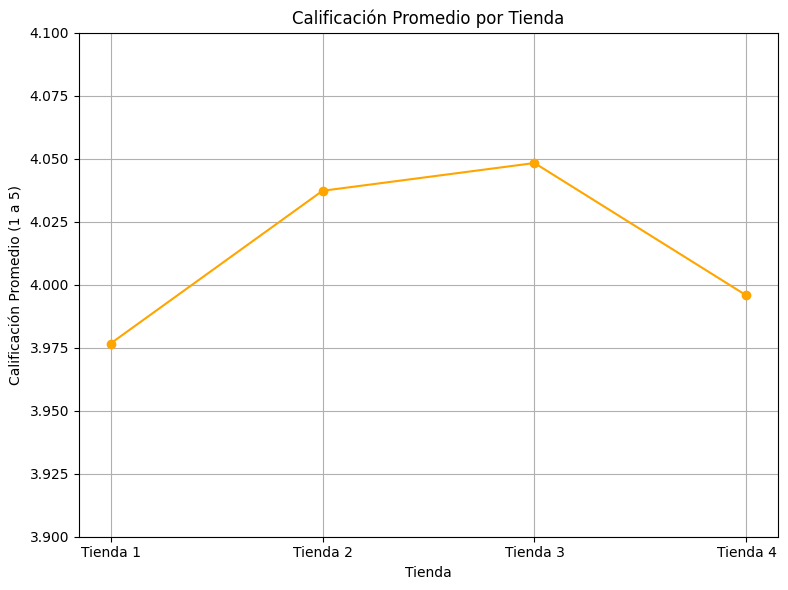

In [ ]:
# Gráfico de líneas

plt.figure(figsize=(8, 6))
plt.plot(list(calificaciones.keys()), list(calificaciones.values()), marker='o', linestyle='-', color='orange')
plt.title("Calificación Promedio por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación Promedio (1 a 5)")
plt.ylim(3.9, 4.1)
plt.grid(True)
plt.tight_layout()
plt.show()

### Resultado CAlificación promedio de las tiendas

+ Tienda 3: 4.05
+ Tienda 1: 3.98  (la más baja)

La Tienda 4 mantiene una calificación de 4.00, sin emabrgo, no es la mejor calificada.

# 4. Productos más y menos vendidos

In [ ]:
# Contar cuántas veces aparece cada producto (ventas) por tienda

productos_1 = tienda1['Producto'].value_counts()
productos_2 = tienda2['Producto'].value_counts()
productos_3 = tienda3['Producto'].value_counts()
productos_4 = tienda4['Producto'].value_counts()

# Identificar los productos más y menos vendidos en cada tienda
mas_menos_vendidos = {
    'Tienda 1': {
        'Más vendido': productos_1.idxmax(),
        'Ventas (más vendido)': productos_1.max(),
        'Menos vendido': productos_1.idxmin(),
        'Ventas (menos vendido)': productos_1.min(),
    },
    'Tienda 2': {
        'Más vendido': productos_2.idxmax(),
        'Ventas (más vendido)': productos_2.max(),
        'Menos vendido': productos_2.idxmin(),
        'Ventas (menos vendido)': productos_2.min(),
    },
    'Tienda 3': {
        'Más vendido': productos_3.idxmax(),
        'Ventas (más vendido)': productos_3.max(),
        'Menos vendido': productos_3.idxmin(),
        'Ventas (menos vendido)': productos_3.min(),
    },
    'Tienda 4': {
        'Más vendido': productos_4.idxmax(),
        'Ventas (más vendido)': productos_4.max(),
        'Menos vendido': productos_4.idxmin(),
        'Ventas (menos vendido)': productos_4.min(),
    },
}


df_mas_menos.reset_index(inplace=True)
df_mas_menos.rename(columns={'index': 'Tienda'}, inplace=True)
df_mas_menos

,Tienda,Más vendido,Ventas (más vendido),Menos vendido,Ventas (menos vendido)
0,Tienda 1,Microondas,60,Auriculares con micrófono,33
1,Tienda 2,Iniciando en programación,65,Juego de mesa,32
2,Tienda 3,Kit de bancas,57,Bloques de construcción,35
3,Tienda 4,Cama box,62,Guitarra eléctrica,33


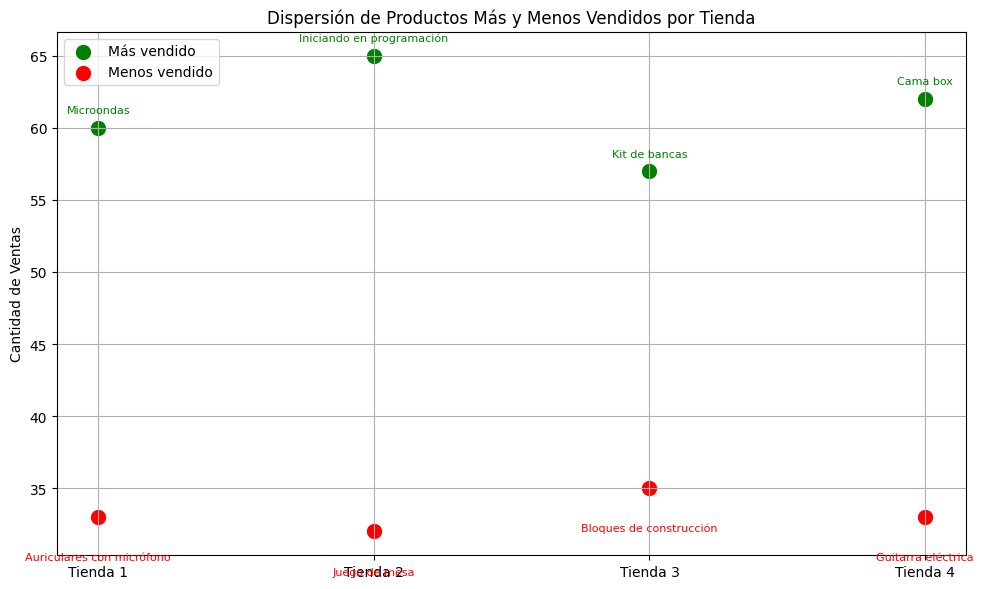

In [ ]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
x_pos = [1, 2, 3, 4]
plt.scatter(x_pos, df_mas_menos['Ventas (más vendido)'].astype(int), color='green', label='Más vendido', s=100)
plt.scatter(x_pos, df_mas_menos['Ventas (menos vendido)'].astype(int), color='red', label='Menos vendido', s=100)

for i, tienda in enumerate(df_mas_menos['Tienda']):
    plt.text(x_pos[i], df_mas_menos['Ventas (más vendido)'][i] + 1,
             df_mas_menos['Más vendido'][i], ha='center', fontsize=8, color='green')
    plt.text(x_pos[i], df_mas_menos['Ventas (menos vendido)'][i] - 3,
             df_mas_menos['Menos vendido'][i], ha='center', fontsize=8, color='red')


plt.xticks(x_pos, df_mas_menos['Tienda'])
plt.title("Dispersión de Productos Más y Menos Vendidos por Tienda")
plt.ylabel("Cantidad de Ventas")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Resultado Productos más y menos vendidos

+ Producto más vendido en Tienda 4: Cama Box (62 ventas)

+ Producto menos vendido: Guitarra eléctrica (33 ventas)

La tienda 4 muestra un desempeño aceptable de su producto más vendido, pero también una alta cantidad de productos con ventas bajas.

# 5. Envío promedio por tienda

In [ ]:
envio_promedio = {
    'Tienda 1': tienda1['Costo de envío'].mean(),
    'Tienda 2': tienda2['Costo de envío'].mean(),
    'Tienda 3': tienda3['Costo de envío'].mean(),
    'Tienda 4': tienda4['Costo de envío'].mean(),
}

envio_promedio_redondeado = {k: f"${v:,.0f} COP" for k, v in envio_promedio.items()}
envio_promedio_redondeado

{'Tienda 1': '$26,019 COP',
 'Tienda 2': '$25,216 COP',
 'Tienda 3': '$24,806 COP',
 'Tienda 4': '$23,459 COP'}

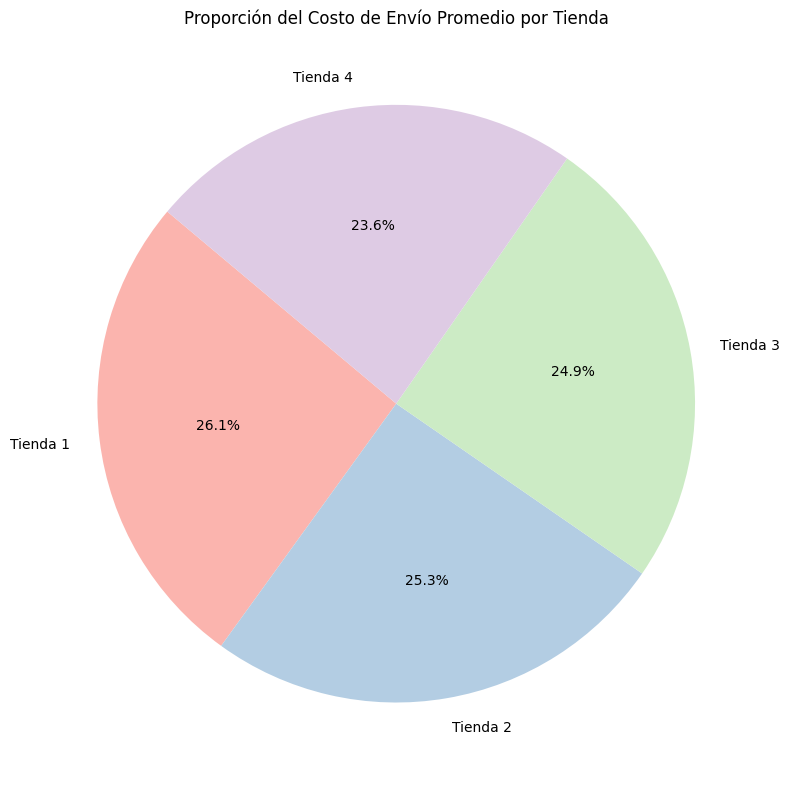

In [ ]:
# Gráfico pie
labels = list(envio_promedio.keys())
sizes = list(envio_promedio.values())

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title("Proporción del Costo de Envío Promedio por Tienda")
plt.axis('equal')  # Asegurar que el gráfico sea un círculo
plt.tight_layout()
plt.show()

### Resultado costo promedio de envío

+ Tienda 4 tiene el menor costo de envío promedio: $23,459 COP
+ Además, presenta menor dispersión y mayor estabilidad en costos de envío

En esta categoría la tienda 4 demuestra una mayor fortaleza logística respecto a las otras tiendas.

## Conclusión

Aunque Tienda 4 tiene un buen control de costos de envío y un desempeño aceptable en ventas, es la menos eficiente en términos de facturación total y no lidera en ninguna categoría.


## Recomendación

Resultado del análisis se recomienda al  Sr. Juan realizar la venta de la tienda 4, ya que muestra el menor retorno económico y no destaca en ninguna categoría clave.